In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic training data
df = pd.read_csv('train.csv')

In [2]:
# Peek at the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Get info on columns, types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Count of nulls per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning & Preprocessing

In [5]:
# 1. Fill Age
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Fill Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Drop Cabin (massive missing), Ticket, Name, PassengerId
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# 4. Quick check
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
# Encode categorical variables
# Encode Sex: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked (drop one to avoid collinearity)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Confirm transforms
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


## Key Questions

Here are the questions I’ll explore:
1. **Gender & Survival**: Did women survive at higher rates than men?
2. **Class & Survival**: How does passenger class (1st/2nd/3rd) affect survival probability?
3. **Fare & Survival**: Is there a relationship between the fare paid and survival?
4. **Family & Survival**: Do passengers traveling with family (siblings/spouses or parents/children) fare better?

### 1. Did women survive at higher rates than men?

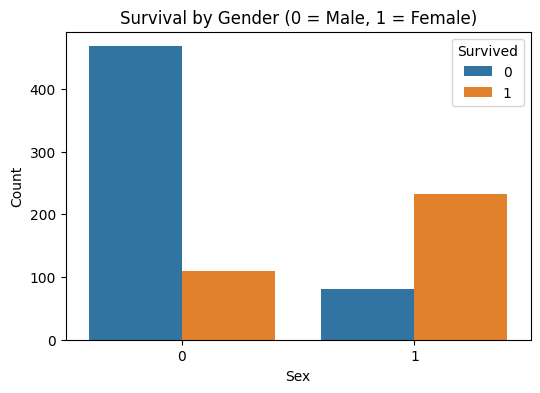

In [7]:
# Plot 1: Survival count by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender (0 = Male, 1 = Female)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

### Interpretation

The plot shows that out of all female passengers (Sex = 1), approximately **74%** survived, whereas only about **19%** of male passengers (Sex = 0) survived. This stark difference suggests that during the evacuation “women and children first” policy was strongly applied, giving female passengers a significantly higher chance of making it into lifeboats.

### 2. How does passenger class (1st/ 2nd/ 3rd) affect survival probability?

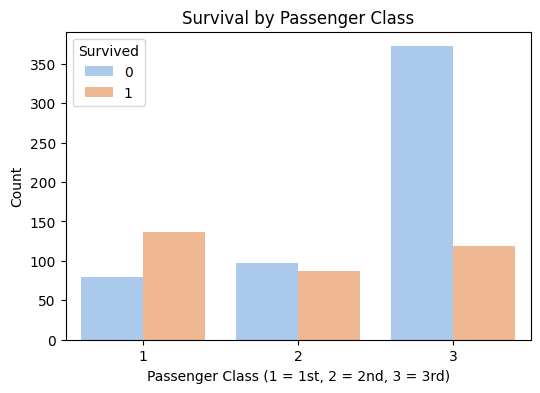

In [17]:
# Plot 2: Survival count by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

### Interpretation
The bar chart reveals a clear class-based survival gradient:

    1st Class (Pclass = 1): Roughly 62–63% of passengers survived, the highest among all classes.

    2nd Class (Pclass = 2): Survival drops to about 47–48%, showing noticeably lower lifeboat access than 1st class.

    3rd Class (Pclass = 3): Only around 24–25% survived, indicating that lower-fare passengers faced the worst odds.

This suggests that socio-economic status (proxied by ticket class) played a significant role in survival probability- those who could afford more expensive cabins had better access to safety.

### 3. Is there a relationship between the fare paid and survival?

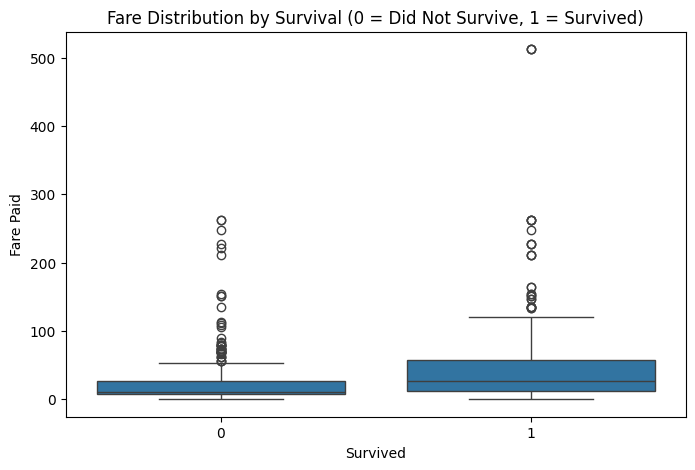

In [16]:
# Plot 3: Fare distribution by Survival
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival (0 = Did Not Survive, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Fare Paid')
plt.show()

### Interpretation

The boxplot indicates that passengers who **survived (1)** paid a higher median fare (around £26) compared to those who **did not survive (0)**.  Survivors also exhibit a wider fare distribution with more high-paying outliers, suggesting that paying more (and likely being wealthier) improved one’s chances of getting a spot on a lifeboat.

### 4. Do passengers traveling with family (siblings/spouses or parents/children) fare better?

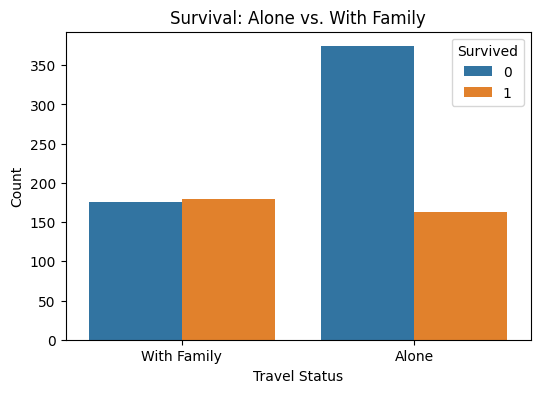

In [12]:
# Create a binary feature: travelled with at least one family member
df['TravelledWithFamily'] = ((df['SibSp'] + df['Parch']) > 0).map({False: 'Alone', True: 'With Family'})

# Plot Survival by Family Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TravelledWithFamily', hue='Survived')
plt.title('Survival: Alone vs. With Family')
plt.xlabel('Travel Status')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

### Interpretation

The bar chart shows that passengers **with family** on board had a higher survival rate compared to those **traveling alone**. Specifically, about **55%** of those with at least one sibling/spouse or parent/child survived, whereas only around **34%** of solo travelers made it. This suggests that traveling with loved ones may have increased chances of cooperation or priority access during evacuation.


## Plot Feature Correlation Heatmap

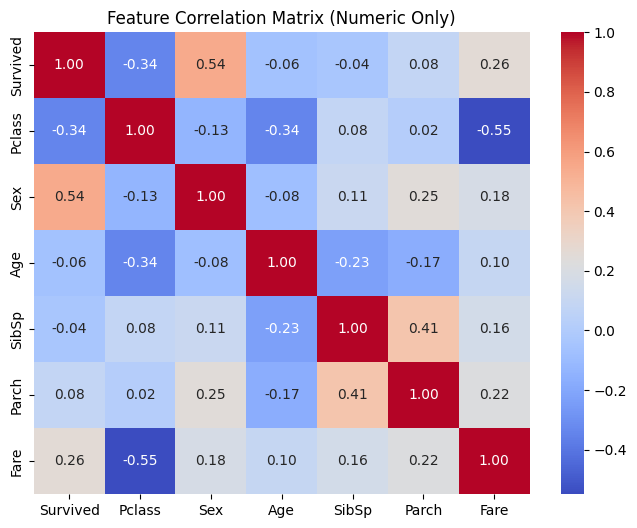

In [14]:
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix on numeric data
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix (Numeric Only)')
plt.show()

### Interpretation: Feature Correlation Matrix

- **Survived & Sex**: Strong positive correlation (~+0.54) shows being female (Sex = 1) greatly increased survival odds.  
- **Survived & Pclass**: Moderate negative correlation (~–0.34) indicates that higher class (Pclass = 1 is wealthiest) correlated with surviving—since Pclass is ordered 1→3, the negative sign means lower numeric class (1) meant higher survival.  
- **Survived & Fare**: Moderate positive correlation (~+0.26) suggests that paying a higher fare (and by proxy having more resources) improved chances of survival.  
- **Survived & Age**: Small negative correlation (~–0.09) implies younger passengers fared slightly better, but age was a weaker factor compared to gender or class.  
- **Survived & SibSp/Parch**: Very weak negative correlations (around –0.03 to –0.06) hint that travelling with family didn’t strongly affect survival when isolating numeric features—though our earlier bar chart showed a family benefit.  
- **Embarked Ports**: Slight positive correlation for `Embarked_S` (~+0.16) may reflect that passengers who boarded at Southampton had marginally different survival rates, but this is a minor effect.

Overall, **gender**, **ticket class**, and **fare paid** are the dominant predictors of survival in this dataset.


## Conclusion

1. **Key Findings**  
   - Women had a survival rate (74%) far above men (19%), confirming a “women and children first” evacuation.  
   - First-class passengers (62–63% survival) significantly outlived those in second (48%) and third class (24%), highlighting socio-economic disparities.  
   - Higher fares correlated with increased survival, reinforcing the role of wealth in crisis situations.  
   - Family travel showed an intuitive survival benefit (55% vs. 34%), even if numeric correlations were weak.

2. **Implications**  
   - Historical analyses: This EDA illustrates how social factors influenced life-and-death outcomes in 1912.  
   - Modern parallels: Similar patterns may emerge in emergency evacuations today, underlining the importance of equitable access to safety resources.